In [2]:
import pandas
dataset = pandas.read_csv('I:/papers.csv')
print(dataset.head())

     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATI

In [3]:
# fetch wordcount for each abstract
dataset['word_count'] = dataset['abstract'].apply(lambda x:len(str(x).split(' ')))
dataset[['abstract', 'word_count']].head()

,abstract,word_count
0,Abstract Missing,2
1,Abstract Missing,2
2,Abstract Missing,2
3,Abstract Missing,2
4,Abstract Missing,2


In [4]:
print(dataset.dtypes)

id             int64
year           int64
title         object
event_type    object
pdf_name      object
abstract      object
paper_text    object
word_count     int64
dtype: object


In [5]:
dataset=dataset.drop(['word_count'],axis=1)

In [6]:
dataset.drop(['year'],axis=1)

,id,title,event_type,pdf_name,abstract,paper_text
0,1,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


In [7]:
# descriptive statistics of word counts
dataset.word_count.describe()

AttributeError: 'DataFrame' object has no attribute 'word_count'

In [ ]:
# identify common words
freq = pandas.Series(' '.join(dataset['abstract']).split()).value_counts()[:20]
freq

In [8]:
# identify uncommon words
freq_un = pandas.Series(' '.join(dataset['abstract']).split()).value_counts()[-20:]
freq_un

nosier                            1
alternate,                        1
text8                             1
English$\leftrightarrow$French    1
common.                           1
block-sparse,                     1
informal                          1
$\kappa                           1
dichotomous                       1
jointly;                          1
centive                           1
right-rotationally                1
(contexts                         1
$+1$                              1
irregularly-sampled               1
goals:                            1
{\em{disagreement-based           1
Six                               1
Lagrangian}                       1
addressed,                        1
dtype: int64

In [9]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = 'boys'
print('stemming:',stem.stem(word))
print('lemmatization:',lem.lemmatize(word,'v'))

stemming: boy
lemmatization: boys


In [10]:
#libraries for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
print(stop_words)

{'s', 'only', 'itself', 'who', 'having', 'before', 'both', 'haven', "aren't", 'some', 'but', 'a', 'they', 'so', 'y', 'few', 'how', "wouldn't", 'their', 'in', 'doesn', 'if', 'the', "shouldn't", "you're", 'has', "won't", 'same', 'couldn', "mustn't", 'her', "she's", "don't", 'further', 'him', 'more', "you'd", 'these', 'into', 'she', 'by', 'mustn', 'had', 'is', 'ourselves', 'it', 've', 'weren', 'below', 'does', 'was', "didn't", "hasn't", 'once', 'those', 'he', 're', 'of', 'while', "doesn't", "needn't", 'or', "you've", 'wouldn', 'between', 'them', 'being', 'there', 'off', 'our', 'have', 'ain', 'where', 'theirs', "mightn't", 'on', 'under', 'until', 'my', 'ours', 'himself', 'do', "it's", 'can', 'herself', 'for', 'up', 'shouldn', 'out', 'again', "isn't", 'over', 'with', 'such', 'from', 'then', 'mightn', 'ma', "should've", 'other', 'd', 'we', "wasn't", 'here', 'hasn', 'because', 'wasn', 'after', 'hadn', 'won', 'against', 'all', 'should', 'at', 'and', 'just', 'an', 'each', 'me', "weren't", 'whic

In [11]:
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)
print(stop_words)

{'s', 'only', 'itself', 'who', 'having', 'before', 'both', 'haven', 'using', "aren't", 'some', 'new', 'but', 'a', 'they', 'so', 'y', 'few', 'how', "wouldn't", 'their', 'in', 'doesn', 'if', 'the', "shouldn't", "you're", 'has', "won't", 'same', 'couldn', "mustn't", 'her', "she's", "don't", 'further', 'him', 'more', "you'd", 'these', 'into', 'she', 'by', 'mustn', 'had', 'is', 'ourselves', 'it', 've', 'weren', 'below', 'previously', 'does', 'was', "didn't", 'show', "hasn't", 'once', 'those', 'he', 're', 'of', 'while', "doesn't", "needn't", 'or', "you've", 'wouldn', 'between', 'them', 'being', 'there', 'off', 'our', 'have', 'ain', 'where', 'theirs', "mightn't", 'on', 'under', 'until', 'my', 'ours', 'himself', 'do', "it's", 'can', 'herself', 'for', 'up', 'shouldn', 'two', 'out', 'again', "isn't", 'over', 'with', 'such', 'result', 'from', 'then', 'shown', 'mightn', 'ma', "should've", 'large', 'other', 'd', 'we', "wasn't", 'here', 'hasn', 'because', 'wasn', 'after', 'hadn', 'won', 'also', 'aga

In [12]:
corpus = []
for i in range(0, 3847):
 #Remove punctuations
 text = re.sub('[^a-zA-Z]', ' ', dataset['abstract'][i])
 
 #Convert to lowercase
 text = text.lower()
 
 #remove tags
 text=re.sub("</?.*?>"," <> ",text)
 
 # remove special characters and digits
 text=re.sub("(\d|\W)+"," ",text)
 
 ##Convert to list from string
 text = text.split()
 
 ##Stemming
 ps=PorterStemmer()
 #Lemmatisation
 lem = WordNetLemmatizer()
 text = [lem.lemmatize(word) for word in text if not word in 
 stop_words] 
 text = " ".join(text)
 corpus.append(text)
#View corpus item
corpus[222]

'abstract missing'

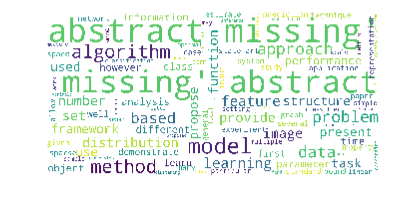

In [13]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib
matplotlib.rcParams['backend'] = 'SVG'
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
# matplotlib inline
wordcloud = WordCloud(scale=64,
 background_color='white',
 stopwords=stop_words,
 max_words=100,
 max_font_size=50, 
 random_state=42
 ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.svg", bbox_inches='tight')#, dpi=900)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
list(cv.vocabulary_.keys())[:10]

['abstract',
 'missing',
 'abstract missing',
 'non',
 'negative',
 'matrix',
 'factorization',
 'nmf',
 'useful',
 'decomposition']

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

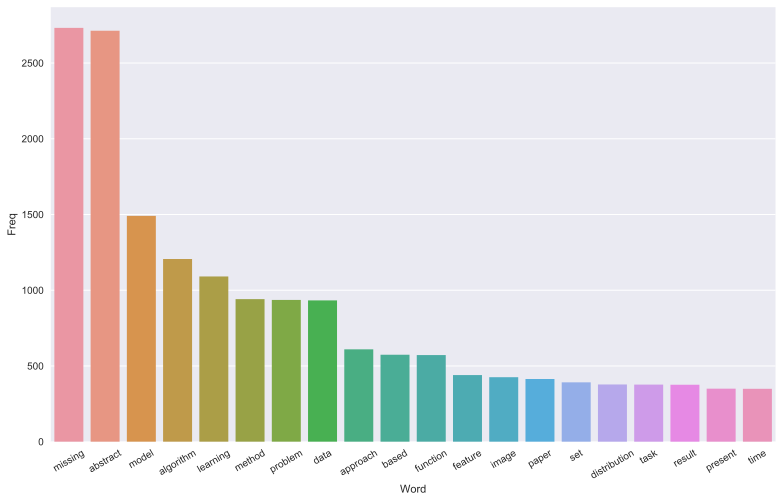

In [16]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
 vec = CountVectorizer().fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in 
 vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], 
 reverse=True)
 return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
fig = g.get_figure()
fig.savefig("output.png")

In [ ]:
print(X)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
 tuples = zip(coo_matrix.col, coo_matrix.data)
 return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
 """get the feature names and tf-idf score of top n items"""
 
 #use only topn items from vector
 sorted_items = sorted_items[:topn]
 
 score_vals = []
 feature_vals = []
 
 # word index and corresponding tf-idf score
 for idx, score in sorted_items:
 
 #keep track of feature name and its corresponding score
   score_vals.append(round(score, 3))
   feature_vals.append(feature_names[idx])
 
 #create a tuples of feature,score
 #results = zip(feature_vals,score_vals)
 results= {}
 for idx in range(len(feature_vals)):
   results[feature_vals[idx]]=score_vals[idx]
 
 return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("Abstract:")
print(doc)
print("Keywords:")
for k in keywords:
 print(k,keywords[k])